# Reconhecimento de Movimentos Utilizando uma Rede *Long Short-Term Memory* (LSTM)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical, split_dataset
import pandas as pd

## Listagem das *features* a partir do ficheiro

In [2]:
labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None)

labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Carregamento e Tratamento dos *Datasets*

In [3]:
# Carregar os datasets
import numpy as np

X_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None)
y_treino = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None)

X_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None)
y_teste_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None)

X_teste = X_teste_val[0:round(0.9*X_teste_val.shape[0])]
X_val = X_teste_val[round(0.9*X_teste_val.shape[0]):]

y_teste = y_teste_val[0:round(0.9*y_teste_val.shape[0])]
y_val = y_teste_val[round(0.9*y_teste_val.shape[0]):]

# Preparar os dados para entrada na rede LSTM
X_treino = X_treino.values.reshape((X_treino.shape[0], 1, X_treino.shape[1]))
X_teste = X_teste.values.reshape((X_teste.shape[0], 1, X_teste.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)
y_val = to_categorical(y_val)

X_treino.shape[1], X_treino.shape[2]

(1, 561)

## Criação do Modelo da Rede Neuronal

In [4]:
import keras

# Definir a arquitetura da rede LSTM
modelo = Sequential()
modelo.add(LSTM(561, input_shape=(X_treino.shape[1], X_treino.shape[2])))
modelo.add(Dense(9, activation="relu"))
modelo.add(Dense(7, activation="softmax"))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

## Treino da Rede Neuronal

In [5]:
# Treinar o modelo
historico = modelo.fit(X_treino, y_treino_cat, epochs=20, batch_size=10, validation_data=(X_val, y_val))
modelo.save("ModeloLSTM.keras")

Epoch 1/20
736/736 [==============================] - 39s 48ms/step - loss: 0.1552 - accuracy: 0.7271 - precision: 0.7846 - recall: 0.6834 - val_loss: 0.0670 - val_accuracy: 0.8780 - val_precision: 0.8866 - val_recall: 0.8746
Epoch 2/20
736/736 [==============================] - 34s 46ms/step - loss: 0.0735 - accuracy: 0.8735 - precision: 0.8750 - recall: 0.8723 - val_loss: 0.0336 - val_accuracy: 0.9763 - val_precision: 0.9763 - val_recall: 0.9763
Epoch 3/20
736/736 [==============================] - 34s 46ms/step - loss: 0.0421 - accuracy: 0.9429 - precision: 0.9431 - recall: 0.9427 - val_loss: 0.0455 - val_accuracy: 0.9729 - val_precision: 0.9729 - val_recall: 0.9729
Epoch 4/20
736/736 [==============================] - 34s 46ms/step - loss: 0.0303 - accuracy: 0.9558 - precision: 0.9558 - recall: 0.9558 - val_loss: 0.0092 - val_accuracy: 0.9966 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 5/20
736/736 [==============================] - 34s 46ms/step - loss: 0.0220 - accuracy: 0

## Avaliação da Precisão da Rede LSTM

In [7]:
# Avaliar a precisão do modelo
_, precisao, precision, recall = modelo.evaluate(X_teste, y_teste_cat)
f1_score = (2 * precision * recall) / (precision + recall)
print(f"Precisão do Modelo: {precisao*100} %")
print(f"Precision do Modelo: {precision*100} %")
print(f"Recall do Modelo: {recall*100} %")
print(f"F1-Score do Modelo: {f1_score*100} %")

83/83 [==============================] - 1s 6ms/step - loss: 0.0581 - accuracy: 0.9397 - precision: 0.9396 - recall: 0.9393
Precisão do Modelo: 93.96681785583496 %
Precision do Modelo: 93.96454095840454 %
Recall do Modelo: 93.92911195755005 %
F1-Score do Modelo: 93.94682311775243 %


## Evolução da Precisão ao Longo do Treino

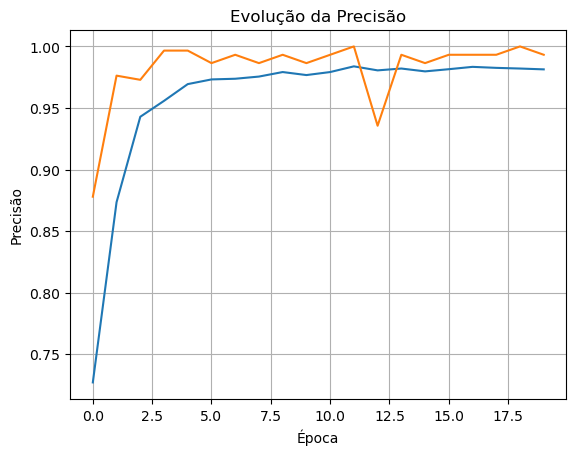

In [8]:
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

precisao = historico.history['accuracy']
validacao = historico.history['val_accuracy']

plt.plot(precisao)
plt.plot(validacao)
plt.title('Evolução da Precisão')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.grid()
plt.savefig("Evolução Precisão Validação LSTM", bbox_inches="tight")
plt.show()

## Matriz de Confusão

83/83 [==============================] - 1s 5ms/step


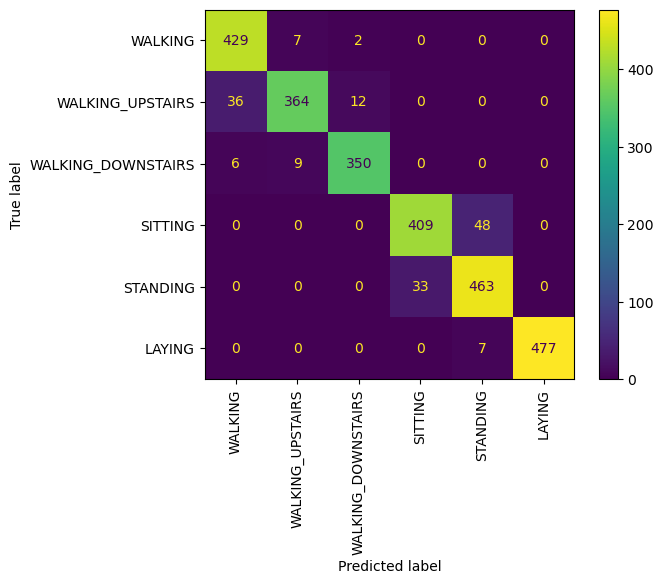

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Saídas previstas
y_previsto = modelo.predict(X_teste)
y_previsto = [np.argmax(y) for y in y_previsto]

# Saídas reais
y_real = [np.argmax(y) for y in y_teste_cat]

# Criação da matriz de confusão
cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation=90)
display.figure_.savefig("Matriz de Confusão LSTM", bbox_inches="tight")